# Assignment 3

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Clustering and Resampling

Let's set up our workspace and use the **Iris dataset** from `scikit-learn`. This dataset is a classic dataset in machine learning and statistics, widely used for clustering tasks. It consists of many samples of iris flowers. Here are the key features and characteristics of the dataset:

##### Features:
1. **Sepal Length**: The length of the sepal in centimeters.
2. **Sepal Width**: The width of the sepal in centimeters.
3. **Petal Length**: The length of the petal in centimeters.
4. **Petal Width**: The width of the petal in centimeters.

In [3]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


#### **Question 1:** 
#### Data inspection

#### Load the Iris dataset:

Use scikit-learn to load the Iris dataset and convert it into a Pandas DataFrame.
Display the first few rows of the dataset. How many observations (rows) and features (columns) does the dataset contain?

In [4]:
from sklearn.datasets import load_iris
# Load the Iris dataset
iris_data = load_iris()

# Convert to DataFrame
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# Display the DataFrame
print(iris_df)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


Answer : The dataset contains 150 observations and 4 features.

#### **Question 2:** 
#### Data-visualization

Let's create plots to visualize the relationships between the features (sepal length, sepal width, petal length, petal width).


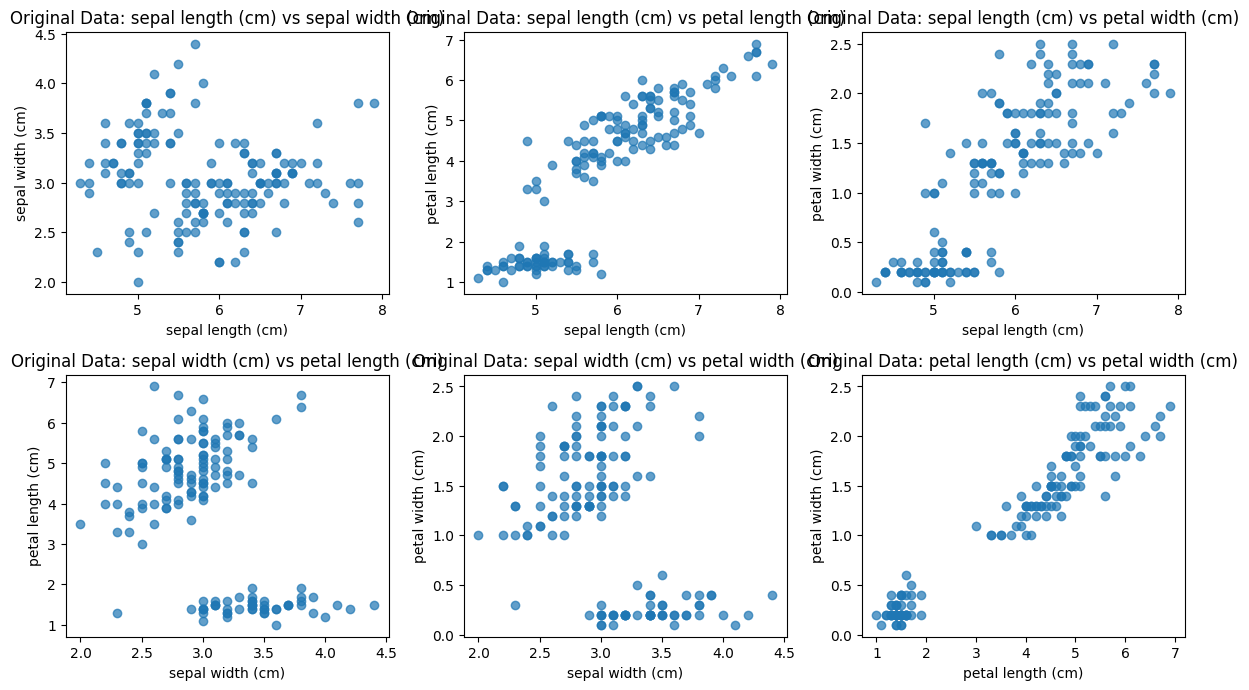

In [5]:
def plot_feature_pairs(data, feature_names, color_labels=None, title_prefix=''):
    """
    Helper function to create scatter plots for all possible pairs of features.
    
    Parameters:
    - data: DataFrame containing the features to be plotted.
    - feature_names: List of feature names to be used in plotting.
    - color_labels: Optional. Cluster or class labels to color the scatter plots.
    - title_prefix: Optional. Prefix for plot titles to distinguish between different sets of plots.
    """
    # Create a figure for the scatter plots
    plt.figure(figsize=(12, 10))
    
    # Counter for subplot index
    plot_number = 1
    
    # Loop through each pair of features
    for i in range(len(feature_names)):
        for j in range(i + 1, len(feature_names)):
            plt.subplot(len(feature_names)-1, len(feature_names)-1, plot_number)
            
            # Scatter plot colored by labels if provided
            if color_labels is not None:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], 
                            c=color_labels, cmap='viridis', alpha=0.7)
            else:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], alpha=0.7)
            
            plt.xlabel(feature_names[i])
            plt.ylabel(feature_names[j])
            plt.title(f'{title_prefix}{feature_names[i]} vs {feature_names[j]}')
            
            # Increment the plot number
            plot_number += 1

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# Get feature names
feature_names = iris_df.columns

# Use the helper function to plot scatter plots without coloring by cluster labels
plot_feature_pairs(iris_df, feature_names, title_prefix='Original Data: ')

**Question:**
- Do you notice any patterns or relationships between the different features? How might these patterns help in distinguishing between different species?

A . Sepal width vs sepal length : 
We don't observe distinct clusters as the data is spread out. 
Which means these two features alone are not helpful enough to determine species.

B. Petal length vs sepal length :
We can observe 2 different clusters as 2 different species, suggesting these 2 features are helpful determining the species.
1. small petal length and small sepal length
2. big petal length and big sepal length

C. Petal width vs sepal length
We can observe 2 different clusters as 2 different species, suggesting these 2 features are helpful determining the species.
1. small sepal length and small petal width
2. big petal width and big sepal length

D. Petal length vs sepal width
We can observe 2 different clusters as 2 different species, suggesting these 2 features are helpful determining the species.
1. big petal length and small sepal width
2. big sepal width and small petal length

E. Petal width vs sepal width
There is some spread of data but we can still see 1 clear trend i.e small petal width and big sepal width. 
We dont see clear grouping for small width sepal width and petal width.  

F. Petal length vs Petal width
Here we observe the clearest disctinction amongst all plots.
Which suggests petal width and length are the most important features to determine species.

#### **Question 3:** 
#### Data cleaning

In [6]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale all the features in the dataset
scaled_features = scaler.fit_transform(iris_df)

# Create a new DataFrame with scaled features
scaled_iris_df = pd.DataFrame(scaled_features, columns=iris_data.feature_names)

# Display the first few rows of the scaled DataFrame
print(scaled_iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


Why is it important to standardize the features of a dataset before applying clustering algorithms like K-Means? Discuss the implications of using unstandardized data in your analysis.

We need to standardize the feutures of database to ensure that all features contribute equally to the distance calculations, preventing and single feature from dominating the result due to its scale.

If we used unstandardized data in one feature can dominate the analysis. For example, in the casr of iris dataset, the sepal length ranges from [4.3, 7.9] while petal width is [0.1, 2.5]. So, Sepal length can totally dominate the analysis if we do not standardize the features.

In [7]:
min_max_values = iris_df.agg(['min', 'max'])
min_max_values

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
min,4.3,2.0,1.0,0.1
max,7.9,4.4,6.9,2.5


#### **Question 4:** 
#### K-means clustering 

Apply the K-Means clustering algorithm to the Iris dataset. Choose the value 3 for the number of clusters (`k=3`) and fit the model. Assign cluster labels to the original data and add them as a new column in the DataFrame.

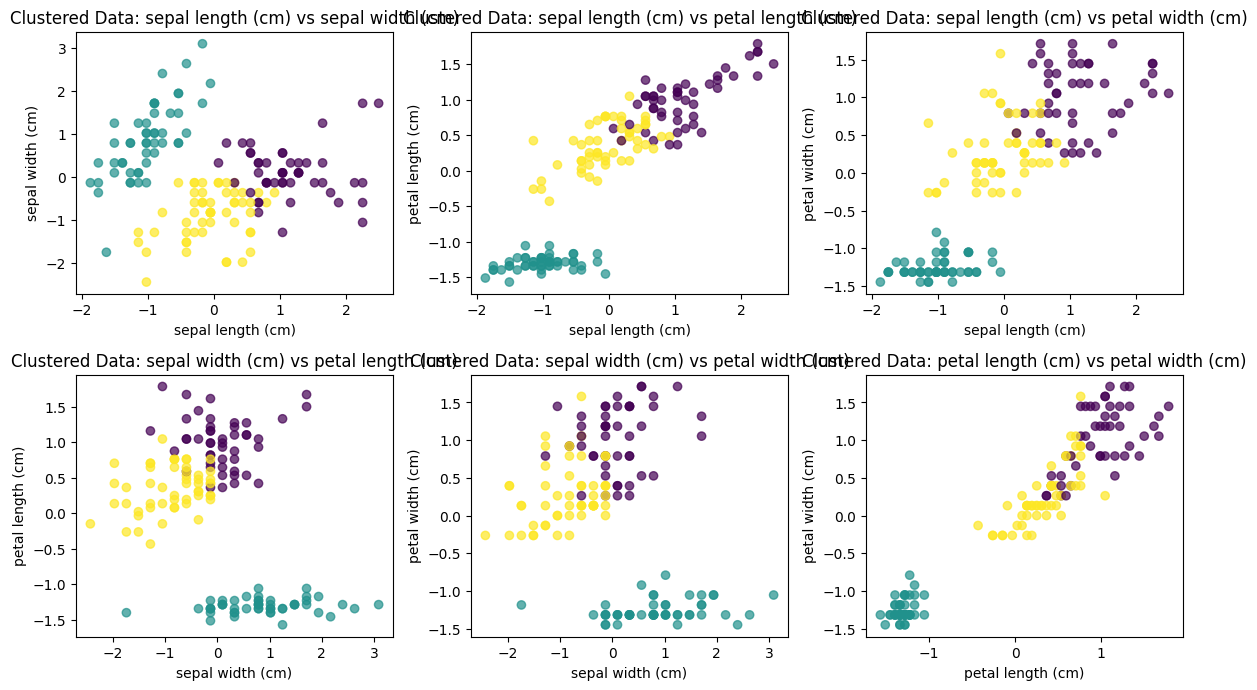

In [8]:
kmeans = KMeans(n_clusters=3, random_state=123)
clusters = kmeans.fit(scaled_iris_df)

clustered_iris_data = scaled_iris_df.copy()

clustered_iris_data['Cluster'] = clusters.labels_

clustered_iris_data


# Use the helper function to plot scatter plots, colored by cluster labels
plot_feature_pairs(clustered_iris_data, feature_names, color_labels=clustered_iris_data['Cluster'], title_prefix='Clustered Data: ')

We chose `k=3` for the number of clusters arbitrarily. However, in a real-world scenario, it is important to determine the optimal number of clusters using appropriate methods.

**Question**: What is one method commonly used to determine the optimal number of clusters in K-means clustering, and why is this method helpful?

To find the optimal number of clusters, we can use the elbow method. 
This involves plotting the total WSSD (Within-Cluster Sum of Squared Distances) against different values of and looking for an “elbow”—the point where increasing the number of clusters no longer leads to a significant reduction in WSSD. The Elbow Method is straightforward to apply and interpret through visual inspection.

#### **Question 5:** 
#### Bootstrapping 

Implement bootstrapping on the mean of Petal Width. Generate 10000 bootstrap samples, calculate the mean for each sample, and compute a 90% confidence interval.

In [9]:
np.random.seed(123)
bootstrap_sample=[]
for i in range(10_000):
    sample = iris_df.sample(frac=1, replace=True)
    sample = sample.assign(replicate = i)
    bootstrap_sample.append(sample)
samples = pd.concat(bootstrap_sample)
samples

mean_petal_width = samples.groupby("replicate")["petal width (cm)"].mean().reset_index(name="sample_mean")

mean_petal_width

,replicate,sample_mean
0,0,1.244667
1,1,1.255333
2,2,1.098667
3,3,1.160000
4,4,1.158667
...,...,...
9995,9995,1.188667
9996,9996,1.148667
9997,9997,1.150000
9998,9998,1.155333


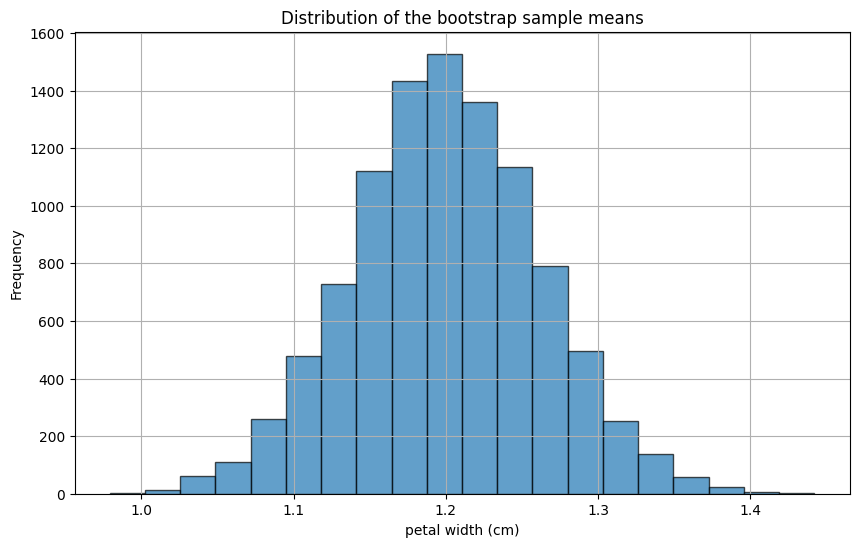

In [10]:
# Plot the histogram of the bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(mean_petal_width['sample_mean'], bins=20, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Distribution of the bootstrap sample means')
plt.xlabel('petal width (cm)')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

In [11]:
real_mean_petal_width = mean_petal_width.mean()

In [13]:
lower_bound = mean_petal_width["sample_mean"].quantile(0.05)
upper_bound = mean_petal_width["sample_mean"].quantile(0.95)

# Display the result
print(f"Mean of Petal Width: {real_mean_petal_width}")
print(f"90% Confidence Interval of Mean Petal Width: ({lower_bound}, {upper_bound})")

Mean of Petal Width: replicate      4999.500000
sample_mean       1.200169
dtype: float64
90% Confidence Interval of Mean Petal Width: (1.0979666666666665, 1.302)


**Question:**
- Why do we use bootstrapping in this context? What does it help us understand about the mean?

> Since we have limited number of samples (i.e 150 samples in our case), we can't construct the exact sampling distribution, making it difficult to measure how much our sample estimate might vary.
> Bootstaping can help us gain a robust estimate of the mean's variability.


**Question:**
- What is the purpose of calculating the confidence interval from the bootstrap samples? How does it help us interpret the variability of the estimate?

>Confidence interval is a range of values that likely contains the true mean based on the sample data.
In our case for example, 90% confidence interval means that if we take 10000 samples, the true mean will fall within the range of [1.0979, 1.302] 90% of the time.

**Question:**

- Reflect on the variability observed in the bootstrapped means and discuss whether the mean of the Petal Width appears to be a stable and reliable estimate based on the confidence interval and the spread of the bootstrapped means.

> The mean of the petal width appears to stable and with low variability. The bootstraping results show consistent means  across resamples, indicating that mean is not influenced by outliers.
> Also, the narrow confidence interval shows that the estimate is reliable with 90% confidence.

# Criteria


| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is thoroughly inspected for the number of variables, observations, and data types, and relevant insights are noted. | Data inspection is missing or lacks detail.         |
| **Data Visualization**                                 | Visualizations (e.g., scatter plots) are well-constructed and correctly interpreted to explore relationships between features and species. | Visualizations are poorly constructed or not correctly interpreted. |
| **Clustering Implementation**                           | K-Means clustering is correctly implemented, and cluster labels are appropriately assigned to the dataset.            | K-Means clustering is missing or incorrectly implemented. |
| **Bootstrapping Process**                              | Bootstrapping is correctly performed, and results are used to assess variable mean stability. | Bootstrapping is missing or incorrectly performed. |

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `11:59 PM - 01/26/2025`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/LCR/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-4-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
